## Эксперимент - все функции активации сигмоиды

In [1]:
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras import layers, models

import os

import matplotlib.pyplot as plt


2024-12-21 21:40:46.011819: I tensorflow/core/util/port.cc:153] oneDNN custom operations are on. You may see slightly different numerical results due to floating-point round-off errors from different computation orders. To turn them off, set the environment variable `TF_ENABLE_ONEDNN_OPTS=0`.
2024-12-21 21:40:46.021862: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:477] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
E0000 00:00:1734817246.033616  389799 cuda_dnn.cc:8310] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
E0000 00:00:1734817246.036768  389799 cuda_blas.cc:1418] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered
2024-12-21 21:40:46.048623: I tensorflow/core/platform/cpu_feature_guard.cc:210] This TensorFlow binary is optimized to use available CPU instr

In [2]:

os.environ["CUDA_VISIBLE_DEVICES"] = "-1"

train_dir = 'dataset_train'
test_dir = 'dataset_test'

image_size = (150, 150)
batch_size = 32
epochs = 10

train_datagen = ImageDataGenerator(
    rescale=1./255,
    rotation_range=40,
    width_shift_range=0.2,
    height_shift_range=0.2,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,
    fill_mode='nearest'
)

test_datagen = ImageDataGenerator(rescale=1./255)

train_generator = train_datagen.flow_from_directory(
    train_dir,
    target_size=image_size,
    batch_size=batch_size,
    class_mode='binary'
)

test_generator = test_datagen.flow_from_directory(
    test_dir,
    target_size=image_size,
    batch_size=batch_size,
    class_mode='binary'
)


Found 1056 images belonging to 2 classes.
Found 4231 images belonging to 2 classes.


### Настраиваем и компилим модель

In [8]:
os.environ["CUDA_VISIBLE_DEVICES"] = "-1"

model = models.Sequential([
    layers.Conv2D(32, (3, 3), activation='elu', input_shape=(150, 150, 3)),
    layers.MaxPooling2D((2, 2)),

    layers.Conv2D(64, (3, 3), activation='elu'),
    layers.MaxPooling2D((2, 2)),

    layers.Conv2D(128, (3, 3), activation='elu'),
    layers.MaxPooling2D((2, 2)),

    layers.Flatten(),
    layers.Dense(512, activation='elu'),
    layers.Dense(1, activation='sigmoid')
])

model.compile(
    loss='binary_crossentropy',
    optimizer='adam',
    metrics=['accuracy']
)


/home/v131v/.local/lib/python3.10/site-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


### Обучаем модель на тренировочном датасете

In [9]:
history = model.fit(
    train_generator,
    steps_per_epoch=train_generator.samples // batch_size,
    epochs=epochs,
    validation_data=test_generator,
    validation_steps=test_generator.samples // batch_size
)


Epoch 1/10
33/33 ━━━━━━━━━━━━━━━━━━━━ 22s 644ms/step - accuracy: 0.5420 - loss: 3.8989 - val_accuracy: 0.6650 - val_loss: 0.6467
Epoch 2/10
33/33 ━━━━━━━━━━━━━━━━━━━━ 22s 673ms/step - accuracy: 0.6958 - loss: 0.5608 - val_accuracy: 0.8686 - val_loss: 0.3337
Epoch 3/10
33/33 ━━━━━━━━━━━━━━━━━━━━ 23s 706ms/step - accuracy: 0.8455 - loss: 0.3713 - val_accuracy: 0.8949 - val_loss: 0.2892
Epoch 4/10
33/33 ━━━━━━━━━━━━━━━━━━━━ 23s 719ms/step - accuracy: 0.8491 - loss: 0.3594 - val_accuracy: 0.8707 - val_loss: 0.3015
Epoch 5/10
33/33 ━━━━━━━━━━━━━━━━━━━━ 22s 677ms/step - accuracy: 0.8494 - loss: 0.3657 - val_accuracy: 0.9010 - val_loss: 0.2508
Epoch 6/10
33/33 ━━━━━━━━━━━━━━━━━━━━ 22s 682ms/step - accuracy: 0.8480 - loss: 0.3557 - val_accuracy: 0.8899 - val_loss: 0.2690
Epoch 7/10
33/33 ━━━━━━━━━━━━━━━━━━━━ 23s 707ms/step - accuracy: 0.8573 - loss: 0.3552 - val_accuracy: 0.8906 - val_loss: 0.2565
Epoch 8/10
33/33 ━━━━━━━━━━━━━━━━━━━━ 22s 669ms/step - accuracy: 0.8437 - loss: 0.3533 - val_accu

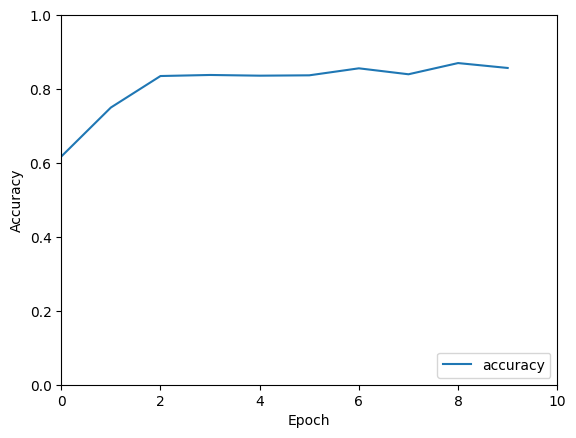

In [10]:
plt.plot(history.history['accuracy'], label='accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.ylim([0, 1])
plt.xlim([0, epochs])
plt.legend(loc='lower right')
plt.show()


### Оценка точности

In [11]:
test_loss, test_acc = model.evaluate(test_generator)
print(f"Точность на тестовых данных: {test_acc}")


133/133 ━━━━━━━━━━━━━━━━━━━━ 12s 89ms/step - accuracy: 0.8790 - loss: 0.2809
Точность на тестовых данных: 0.8815882802009583


### Результат - быстрее выход на плато при обучении, но ниже итоговая точность. Попробуем swish.

In [ ]:
os.environ["CUDA_VISIBLE_DEVICES"] = "-1"

model = models.Sequential([
    layers.Conv2D(32, (3, 3), activation='swish', input_shape=(150, 150, 3)),
    layers.MaxPooling2D((2, 2)),

    layers.Conv2D(64, (3, 3), activation='swish'),
    layers.MaxPooling2D((2, 2)),

    layers.Conv2D(128, (3, 3), activation='swish'),
    layers.MaxPooling2D((2, 2)),

    layers.Flatten(),
    layers.Dense(512, activation='swish'),
    layers.Dense(1, activation='sigmoid')
])

model.compile(
    loss='binary_crossentropy',
    optimizer='adam',
    metrics=['accuracy']
)


In [15]:
history = model.fit(
    train_generator,
    steps_per_epoch=train_generator.samples // batch_size,
    epochs=epochs,
    validation_data=test_generator,
    validation_steps=test_generator.samples // batch_size
)


Epoch 1/10
33/33 ━━━━━━━━━━━━━━━━━━━━ 26s 757ms/step - accuracy: 0.6232 - loss: 0.9212 - val_accuracy: 0.9032 - val_loss: 0.2451
Epoch 2/10
33/33 ━━━━━━━━━━━━━━━━━━━━ 24s 741ms/step - accuracy: 0.8326 - loss: 0.3641 - val_accuracy: 0.8942 - val_loss: 0.2718
Epoch 3/10
33/33 ━━━━━━━━━━━━━━━━━━━━ 25s 759ms/step - accuracy: 0.8549 - loss: 0.3723 - val_accuracy: 0.9003 - val_loss: 0.2379
Epoch 4/10
33/33 ━━━━━━━━━━━━━━━━━━━━ 24s 742ms/step - accuracy: 0.8664 - loss: 0.3503 - val_accuracy: 0.8812 - val_loss: 0.2870
Epoch 5/10
33/33 ━━━━━━━━━━━━━━━━━━━━ 24s 743ms/step - accuracy: 0.8301 - loss: 0.4002 - val_accuracy: 0.8899 - val_loss: 0.2553
Epoch 6/10
33/33 ━━━━━━━━━━━━━━━━━━━━ 25s 759ms/step - accuracy: 0.8832 - loss: 0.3123 - val_accuracy: 0.8835 - val_loss: 0.2673
Epoch 7/10
33/33 ━━━━━━━━━━━━━━━━━━━━ 24s 731ms/step - accuracy: 0.8516 - loss: 0.3591 - val_accuracy: 0.8937 - val_loss: 0.2610
Epoch 8/10
33/33 ━━━━━━━━━━━━━━━━━━━━ 25s 756ms/step - accuracy: 0.8633 - loss: 0.3588 - val_accu

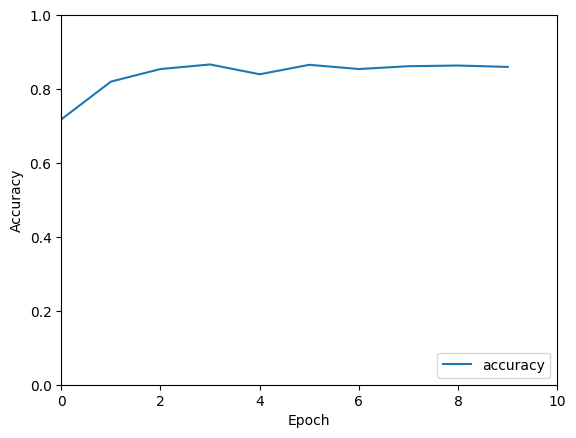

In [16]:
plt.plot(history.history['accuracy'], label='accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.ylim([0, 1])
plt.xlim([0, epochs])
plt.legend(loc='lower right')
plt.show()


In [17]:
test_loss, test_acc = model.evaluate(test_generator)
print(f"Точность на тестовых данных: {test_acc}")


133/133 ━━━━━━━━━━━━━━━━━━━━ 12s 93ms/step - accuracy: 0.8953 - loss: 0.2655
Точность на тестовых данных: 0.8962420225143433


## Результат - swish оказалась лучше, чем elu (быстрее выход на плато, чуть выше точность), но в итоге по точности все еще ниже обычного relu

### Сохраняем модельку в keras формате

In [ ]:
# Сохранение модели
model.save('butterfly_classifier_functions.keras')
